# Task 4.9 Part 2

## Contents List:

- Import libraries and orders_products_customers_merged.pkl

- Create a histogram of the 'order_hour_of_day' column

- Create a bar chart based on 'loyalty_flag'

- Create a line chart with 'prices' and 'order_hour_of_day'
    - Create sampling data
    - Create line chart

- Create a line chart with age and number of dependants

- Create a scatterplot for age and income

- Export visualizations

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Import orders_products_customers_merged.pkl as dataframe

path = r'C:\Users\susan\OneDrive\Desktop\Data Analytics Program\June 2023 Instacart Basket Analysis'

In [3]:
df_ords_prod_cust = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers_merged.pkl'))

In [4]:
# Check shape

df_ords_prod_cust.shape

(32404859, 33)

In [5]:
# Check output

df_ords_prod_cust.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,frequency_flag,First Name,Last Name,Gender,State,Age,date_joined,n_dependants,fam_status,income
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


# Step 3 Create a histogram of the 'order_hour_of_day' column

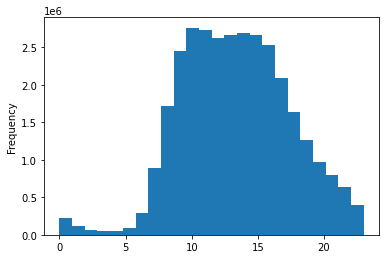

In [6]:
hist = df_ords_prod_cust['order_hour_of_day'].plot.hist(bins = 24)

## The histogram shows that the majority of orders are placed between 10am and 4pm, while the least amount of orders are placed between midnight to 6am

# Step 4: Create a bar chart of orders among customers in terms of loyalty

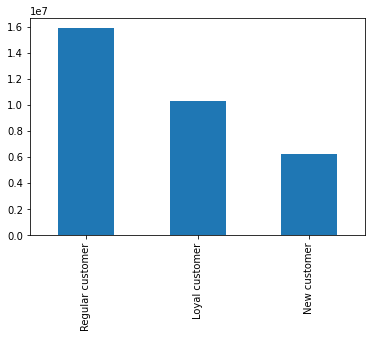

In [7]:
bar = df_ords_prod_cust['loyalty_flag'].value_counts().plot.bar()

# Step 5: Create a line chart with 'prices' and 'order_hour_of_day' using an accurate sample of the data

## Create sampling data

In [8]:
# Create a list holding True/False values to the test np.random.rand() <= 0.7

np.random.seed(4)
dev = np.random.rand(len(df_ords_prod_cust)) <= 0.7

In [9]:
# Check list

dev

array([False,  True, False, ...,  True,  True,  True])

In [10]:
# Store 70% of the sample in the dataframe big

big = df_ords_prod_cust[dev]

In [11]:
# Store 30% of the sample in the dataframe small

small = df_ords_prod_cust[~dev]

In [12]:
# Check rows of original df_ords_prod_cust dataframe

len(df_ords_prod_cust)

32404859

In [13]:
# Check rows of big and small dataframes combined

len(big) + len(small)

32404859

In [14]:
# Reduce the sample to only necessary columns for line chart

df = small[['order_hour_of_day', 'prices']]

## Create line chart

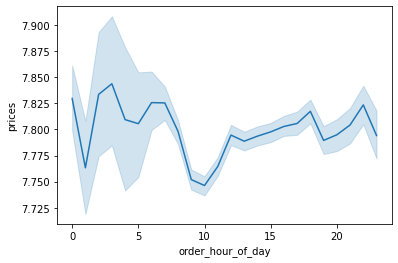

In [15]:
line = sns.lineplot(data = df, x = 'order_hour_of_day', y = 'prices')

## Compare line chart using 'small' to line chart using 'big'

In [16]:
df_2 = big[['order_hour_of_day', 'prices']]

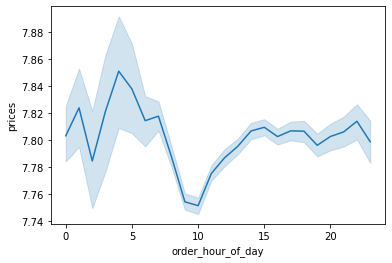

In [17]:
line_2 = sns.lineplot(data = df_2, x = 'order_hour_of_day', y = 'prices')

## The line charts from both samples have a similar pattern.

# Step 6: Create a line chart with age and number of dependants

In [18]:
# Reduce the sample to only necessary columns for line chart

df_3 = small[['Age', 'n_dependants']]

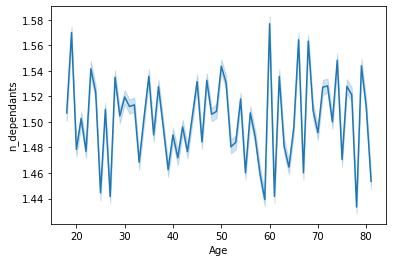

In [19]:
# Create a line chart

line_3 = sns.lineplot(data = df_3, x = 'Age', y = 'n_dependants')

## The line chart does not show a clear trend between age and the number of dependants. It does show that most people have between 1-2 dependants.

# Step 7: Create a scatterplot for 'Age' and 'income'

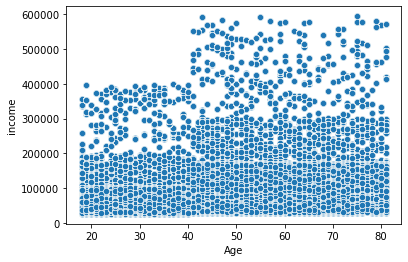

In [20]:
scatterplot = sns.scatterplot(x = 'Age', y = 'income', data = df_ords_prod_cust)

## Based on the density of the dots in the scatterplot, the majority of people below age 40 have an income under 200,000 while the majority of people above age 40 have an income under 300,000. There are also people above age 40 who have an income between 400,000-600,000. The scatterplot shows a correlation that older people tend to have more spending power

# Export visualizations

In [21]:
hist.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_order_hour_of_day.png'))

In [22]:
bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_orders_based_on_cust_loyalty.png'))

In [23]:
line_2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_prices_vs_order_hour_of_day.png'))

In [24]:
line_3.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_age_vs_n_dependants.png'))

In [25]:
scatterplot.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatter_age_vs_income.png'))